Here's the link if you want to test: https://colab.research.google.com/drive/16-BbPjhT6ZtAioHj9OL_QoA-OK1H0n6N?usp=sharing

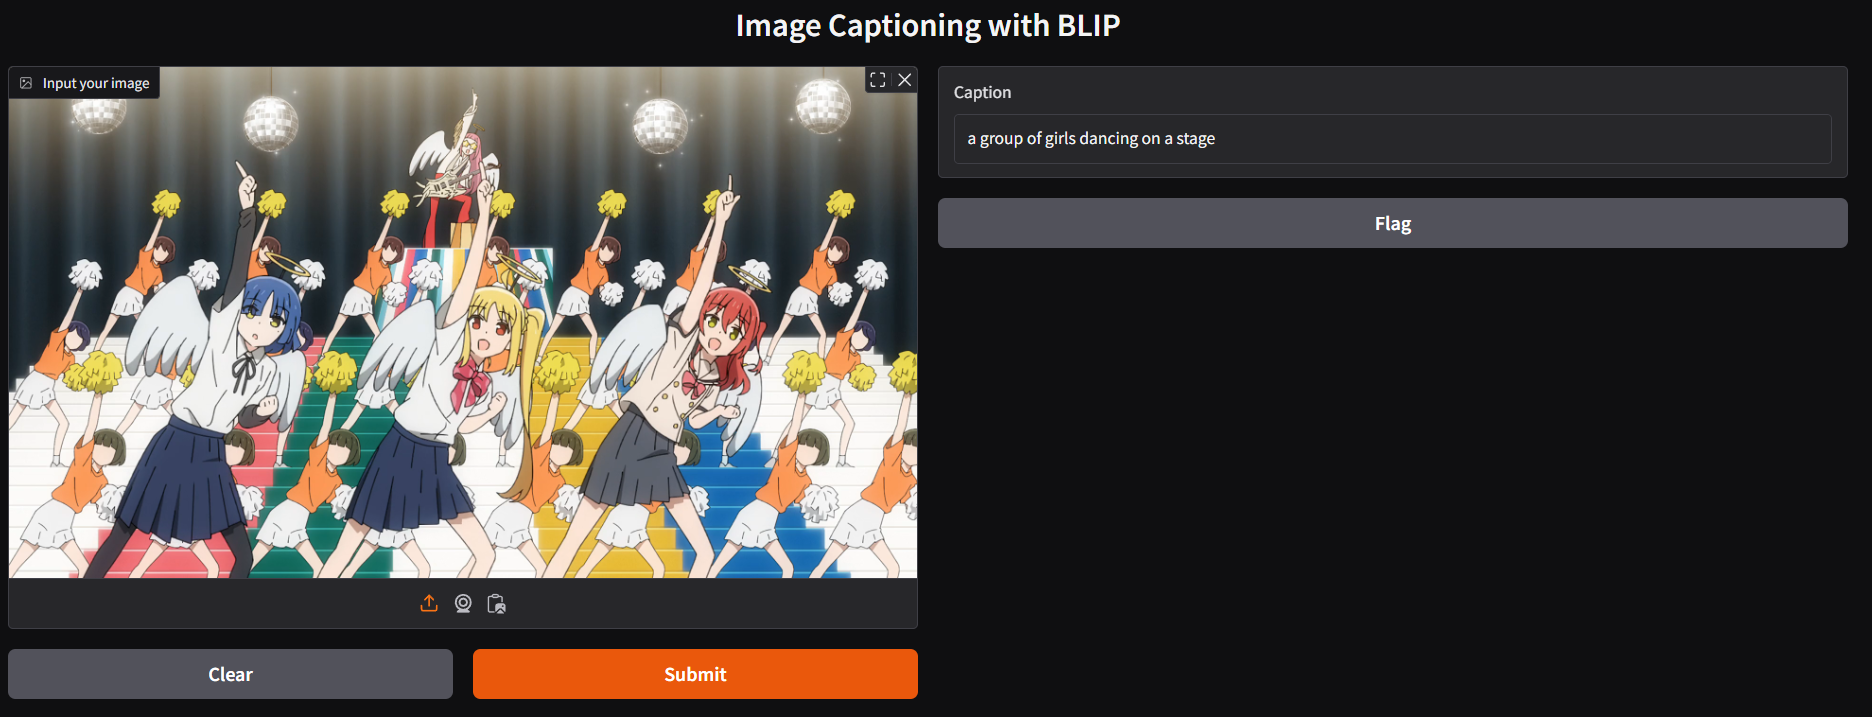

In [ ]:
!pip install transformers gradio Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# Set up the device for computation (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained BLIP model and processor for image captioning
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", torch_dtype=torch.float16).to(device)

# Generate a caption from an image
def generate_caption(raw_image: Image) -> str:
    inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)
    outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

# Test

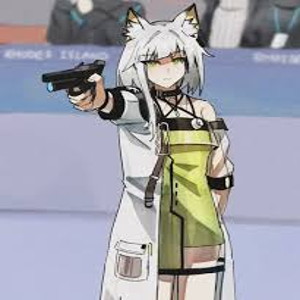

a woman in a white coat holding a gun


In [ ]:
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjJAddM9bnkk8nl8M7mh1s4uxg6HegDELk0g&s'
image = Image.open(requests.get(image_url, stream=True).raw)
# Display image
resized_image = image.resize((300, 300))
display(resized_image)
# Display caption
caption = generate_caption(image)
print(caption)

# Image Captioning using Gradio + BLIP

In [ ]:
import gradio as gr

# Input an image
image = gr.Image(label="Input your image")

# Output is a caption (string)
caption = gr.Textbox(label="Caption")

# Build interface with generated_caption function, input an image and display caption
gr.Interface(
    fn=generate_caption,
    inputs=image,
    outputs=caption,
    title="Image Captioning with BLIP").launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3a9f7b9ed4d6a49f64.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
